## Importando Bibliotecas e Dados

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Definir as ações
ticker1 = "LEVE3.SA"
dolar = "USDBRL=X"

# Definir as datas inicial e final
data_inicial = "2017-01-01"
data_final = "2022-12-31"

# Baixar os dados históricos
dados_leve = yf.download(ticker1, data_inicial, data_final)
cotacao_dolar = yf.download(dolar, data_inicial, data_final)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
dados_leve

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,20.790001,20.790001,20.490000,20.610001,12.983636,29500
2017-01-03,20.750000,21.730000,20.320000,21.730000,13.689198,145400
2017-01-04,21.730000,23.100000,21.540001,22.900000,14.426261,356000
2017-01-05,22.850000,23.250000,22.850000,23.250000,14.646749,298900
2017-01-06,23.219999,23.360001,22.799999,22.799999,14.363260,215400
...,...,...,...,...,...,...
2022-12-23,29.180000,30.500000,28.860001,30.180000,27.639412,195000
2022-12-26,30.370001,31.030001,29.950001,30.680000,28.097322,155700
2022-12-27,31.010000,31.010000,30.120001,30.410000,27.850050,142200


##Preparação dos Dados

In [ ]:
# Criar a nova coluna Movimento 7 dias
dados_leve["Movimento_7"] = dados_leve["Close"].rolling(window=7).mean() > dados_leve["Close"].shift(7)

In [ ]:
# Converter os valores True e False para 0 e 1
dados_leve["Movimento_7"] = (dados_leve["Movimento_7"] == True).astype(int)

In [ ]:
dados = pd.merge(dados_leve, cotacao_dolar, on="Date")

In [ ]:
dados

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Movimento_7,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,,
2017-01-02,20.790001,20.790001,20.490000,20.610001,12.983636,29500,0,3.2532,3.279700,3.242700,3.2532,3.2532,0
2017-01-03,20.750000,21.730000,20.320000,21.730000,13.689198,145400,0,3.2841,3.289700,3.247500,3.2840,3.2840,0
2017-01-04,21.730000,23.100000,21.540001,22.900000,14.426261,356000,0,3.2635,3.264300,3.218800,3.2635,3.2635,0
2017-01-05,22.850000,23.250000,22.850000,23.250000,14.646749,298900,0,3.2149,3.227600,3.199800,3.2141,3.2141,0
2017-01-06,23.219999,23.360001,22.799999,22.799999,14.363260,215400,0,3.1975,3.211800,3.189400,3.1977,3.1977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,29.180000,30.500000,28.860001,30.180000,27.639412,195000,1,5.1656,5.175000,5.116316,5.1656,5.1656,0
2022-12-26,30.370001,31.030001,29.950001,30.680000,28.097322,155700,1,5.1643,5.204200,5.162500,5.1643,5.1643,0
2022-12-27,31.010000,31.010000,30.120001,30.410000,27.850050,142200,1,5.2175,5.291600,5.124977,5.2175,5.2175,0


In [ ]:
dados.drop(columns=['Open_x', 'High_x', 'Low_x', 'Adj Close_x', 'Volume_x', 'Open_y', 'High_y', 'Low_y', 'Adj Close_y', 'Volume_y'], axis=1, inplace=True)
dados

,Close_x,Movimento_7,Close_y
Date,,,
2017-01-02,20.610001,0,3.2532
2017-01-03,21.730000,0,3.2840
2017-01-04,22.900000,0,3.2635
2017-01-05,23.250000,0,3.2141
2017-01-06,22.799999,0,3.1977
...,...,...,...
2022-12-23,30.180000,1,5.1656
2022-12-26,30.680000,1,5.1643
2022-12-27,30.410000,1,5.2175


In [ ]:
# Criar a coluna fechamento
dados["fechamento"] = pd.to_numeric(dados["Close_x"])

# Separar as colunas de entrada e saída
X = dados[["Close_x"]]
y = dados["fechamento"]

# Normalizar os dados
X = (X - X.mean()) / X.std()

In [ ]:
dados

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Movimento_7,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,fechamento
Date,,,,,,,,,,,,,,
2017-01-02,20.790001,20.790001,20.490000,20.610001,12.983636,29500,0,3.2532,3.279700,3.242700,3.2532,3.2532,0,20.610001
2017-01-03,20.750000,21.730000,20.320000,21.730000,13.689198,145400,0,3.2841,3.289700,3.247500,3.2840,3.2840,0,21.730000
2017-01-04,21.730000,23.100000,21.540001,22.900000,14.426261,356000,0,3.2635,3.264300,3.218800,3.2635,3.2635,0,22.900000
2017-01-05,22.850000,23.250000,22.850000,23.250000,14.646749,298900,0,3.2149,3.227600,3.199800,3.2141,3.2141,0,23.250000
2017-01-06,23.219999,23.360001,22.799999,22.799999,14.363260,215400,0,3.1975,3.211800,3.189400,3.1977,3.1977,0,22.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,29.180000,30.500000,28.860001,30.180000,27.639412,195000,1,5.1656,5.175000,5.116316,5.1656,5.1656,0,30.180000
2022-12-26,30.370001,31.030001,29.950001,30.680000,28.097322,155700,1,5.1643,5.204200,5.162500,5.1643,5.1643,0,30.680000
2022-12-27,31.010000,31.010000,30.120001,30.410000,27.850050,142200,1,5.2175,5.291600,5.124977,5.2175,5.2175,0,30.410000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Separar os dados de treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, shuffle=False)

##Montando o modelo de Regressão Polinomial

In [ ]:
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

In [ ]:
# Criar um modelo de regressão linear
modelo = LassoLars(alpha=0.1)

In [ ]:
# Adicionar termos polinomiais
transformador = PolynomialFeatures(degree=3)
X_treinamento_transformado = transformador.fit_transform(X_treinamento)
X_teste_transformado = transformador.transform(X_teste)

In [ ]:
# Treinar o modelo nos dados de treinamento
modelo.fit(X_treinamento_transformado, y_treinamento)

In [ ]:
predicoes = modelo.predict(X_teste_transformado)

# Avaliar o desempenho do modelo
rmse = np.sqrt(mean_squared_error(y_teste, predicoes))
mae = mean_absolute_error(y_teste, predicoes)
mse = mean_squared_error(y_teste, predicoes)
r2 = r2_score(y_teste, predicoes)

# Imprimir o RMSE e o MAE
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)

RMSE: 0.1654872683915436
MAE: 0.13093054483547542
MSE: 0.027386035999694785
R^2: 0.9978721843155194


In [ ]:
# Fazer previsões usando o modelo
predicoes = modelo.predict(X_teste_transformado)

# Comparar os dados reais e as previsões
df = pd.DataFrame({
    "real": y_teste,
    "previsao": predicoes
})

print(df.head(15))

                 real   previsao
Date                            
2021-10-21  42.939999  43.574729
2021-10-22  38.330002  38.315228
2021-10-25  39.220001  39.294527
2021-10-26  37.630001  37.555762
2021-10-27  35.889999  35.705762
2021-10-28  36.410000  36.253265
2021-10-29  34.080002  33.832271
2021-11-01  35.000000  34.778549
2021-11-03  35.509998  35.308389
2021-11-04  33.279999  33.018659
2021-11-05  33.020000  32.755962
2021-11-08  33.610001  33.353282
2021-11-09  33.049999  32.786231
2021-11-10  33.410000  33.150318
2021-11-11  34.470001  34.231966


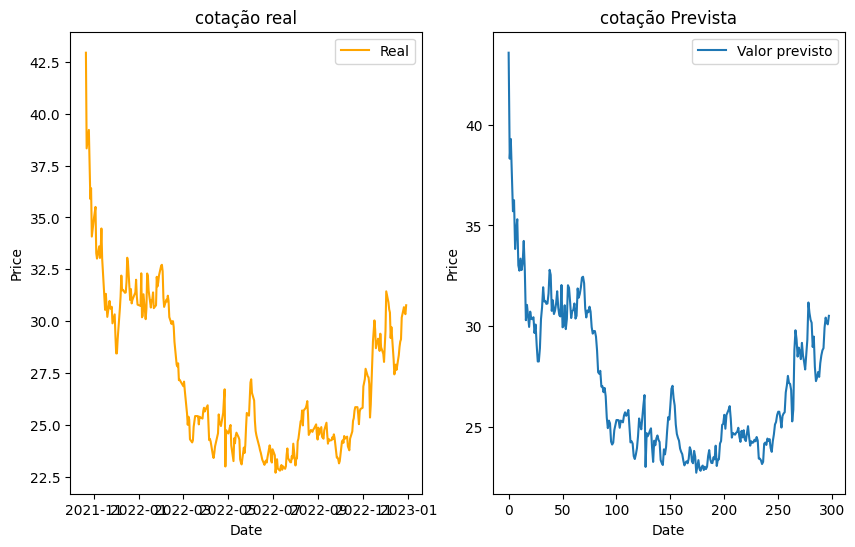

In [ ]:
dados_leve_final = dados['Close_x'][-298:]

# Create a figure with two lines
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot the data
ax[0].plot(dados_leve_final, label= 'Real', color='orange')
ax[0].set_title('cotação real')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()

ax[1].plot(predicoes, label="Valor previsto")
ax[1].set_title('cotação Prevista')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[1].legend()

# Show the plots
plt.show()